In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import  MinMaxScaler,LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-04 21:35:51.519307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 21:35:51.519463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 21:35:51.707136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
x=df.drop(columns=['HeartDisease'])
y=df[['HeartDisease']]
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [5]:
encoder=LabelEncoder()

x['ChestPainType']=encoder.fit_transform(x[ 'ChestPainType'])
x['Sex']=encoder.fit_transform(x[ 'Sex'])
x['ExerciseAngina']=encoder.fit_transform(x[ 'ExerciseAngina'])
x['RestingECG']=encoder.fit_transform(x[ 'RestingECG'])
x['ST_Slope']=encoder.fit_transform(x[ 'ST_Slope'])
x


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [6]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x[1]

array([0.42857143, 0.        , 0.66666667, 0.8       , 0.29850746,
       0.        , 0.5       , 0.67605634, 0.        , 0.40909091,
       0.5       ])

In [7]:
x[1]

array([0.42857143, 0.        , 0.66666667, 0.8       , 0.29850746,
       0.        , 0.5       , 0.67605634, 0.        , 0.40909091,
       0.5       ])

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42,shuffle=True)
print(x_train.shape)
print(y_train.shape)


(826, 11)
(826, 1)


In [9]:
 model = Sequential( [ Dense(16, activation= 'relu',input_dim=11),
                       Dense(8, activation='relu'),
                      Dense(8, activation='relu'),
                        
                             Dense(1, activation= 'sigmoid'),
                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 409 (1.60 KB)
Trainable params: 409 (1.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
21/21 [==============================] - 1s 13ms/step - loss: 0.6963 - accuracy: 0.5621 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 2/150
21/21 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5621 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 3/150
21/21 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.5621 - val_loss: 0.6786 - val_accuracy: 0.5000
Epoch 4/150
21/21 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.5621 - val_loss: 0.6650 - val_accuracy: 0.5000
Epoch 5/150
21/21 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.5712 - val_loss: 0.6454 - val_accuracy: 0.5361
Epoch 6/150
21/21 [==============================] - 0s 4ms/step - loss: 0.6043 - accuracy: 0.6667 - val_loss: 0.6157 - val_accuracy: 0.6566
Epoch 7/150
21/21 [==============================] - 0s 4ms/step - loss: 0.5651 - accuracy: 0.7303 - val_loss: 0.5857 - val_accuracy: 0.6867
Epoch 8/150


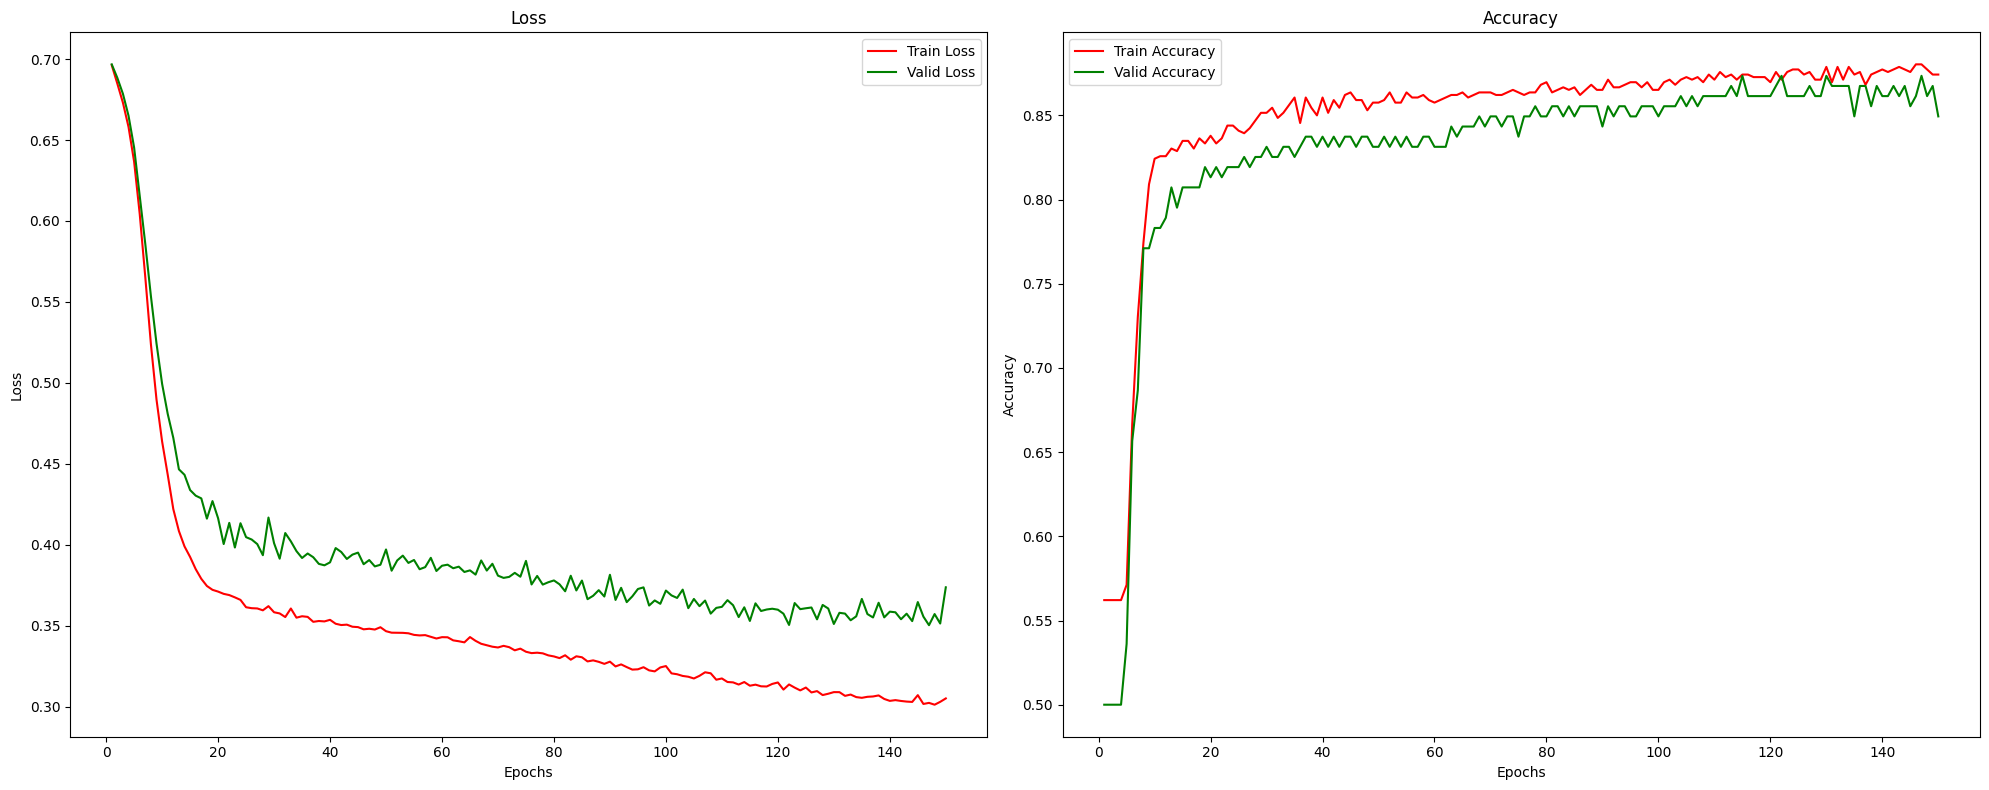

In [11]:
import matplotlib.pyplot as plt
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [12]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 4ms/step


In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[30,  8],
       [ 4, 50]])

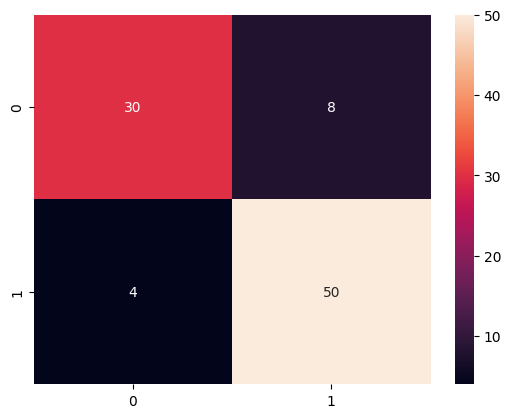

In [14]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()